In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df  = pd.read_csv("https://query.data.world/s/gb5wjsz5c76sgfyeas22h4loq7syqt")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
100*df.isnull().sum()/df.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.Embarked.fillna('S', inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

- You should scale your data
- If you have categorical data and you want to use it then make sure to create dummay variable for them

In [ ]:
df.Sex.replace(['female', 'male'], [0,1], inplace = True)
df.Embarked.replace(['S', 'C', 'Q'], [0,1,2], inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


## Iterative Imputer

In [ ]:
!pip install fancyimpute

     |████████████████████████████████| 2.7 MB 11.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.9 MB/s 
     |████████████████████████████████| 27.4 MB 106 kB/s 
     |████████████████████████████████| 454.3 MB 17 kB/s 
     |████████████████████████████████| 1.2 MB 54.4 MB/s 
     |████████████████████████████████| 4.0 MB 42.3 MB/s 
     |████████████████████████████████| 462 kB 69.3 MB/s 
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=d00acf7d0d273c3e1cde115bb099572ff1dbc78e06210f39e9b477986f480512
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built knnimpute
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.39.0
    Uninstalling grpcio-1.39.0:
      Successfully uninstalled grpcio-1.39.0

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [ ]:
X = df.drop("Survived", axis = 1)
y = df.Survived

In [ ]:
from fancyimpute import IterativeImputer

In [ ]:
fancy = IterativeImputer()
X_ii = pd.DataFrame(fancy.fit_transform(X))
X_ii.head()

,0,1,2,3,4,5,6
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0


In [ ]:
X_ii.columns = X.columns

In [ ]:
X_ii.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0


In [ ]:
X_ii.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Imputed Age with Iterative Imputer')

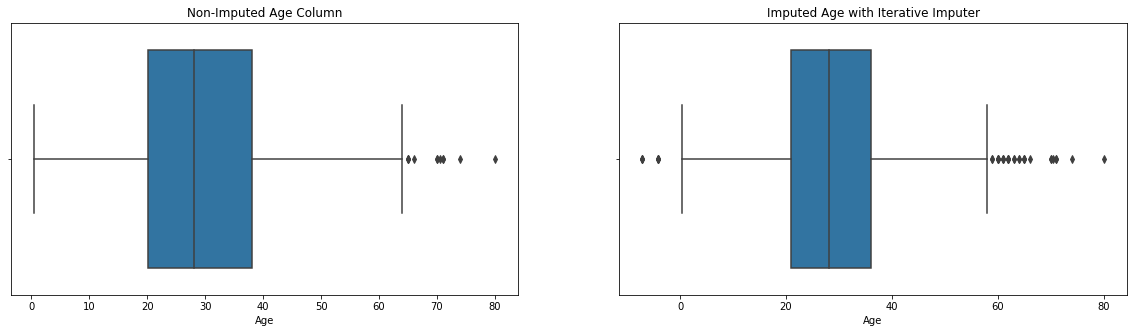

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(X['Age'])
plt.title("Non-Imputed Age Column")

plt.subplot(1,2,2)
sns.boxplot(X_ii['Age'])
plt.title("Imputed Age with Iterative Imputer")

In [ ]:
from fancyimpute import KNN
X_knn = pd.DataFrame(KNN().fit_transform(X))
X_knn.columns = X.columns
X_knn.head()

Imputing row 1/891 with 0 missing, elapsed time: 0.143
Imputing row 101/891 with 0 missing, elapsed time: 0.145
Imputing row 201/891 with 0 missing, elapsed time: 0.146
Imputing row 301/891 with 1 missing, elapsed time: 0.147
Imputing row 401/891 with 0 missing, elapsed time: 0.149
Imputing row 501/891 with 0 missing, elapsed time: 0.150
Imputing row 601/891 with 0 missing, elapsed time: 0.152
Imputing row 701/891 with 0 missing, elapsed time: 0.153
Imputing row 801/891 with 0 missing, elapsed time: 0.154


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Imputed Age with KNN Imputer')

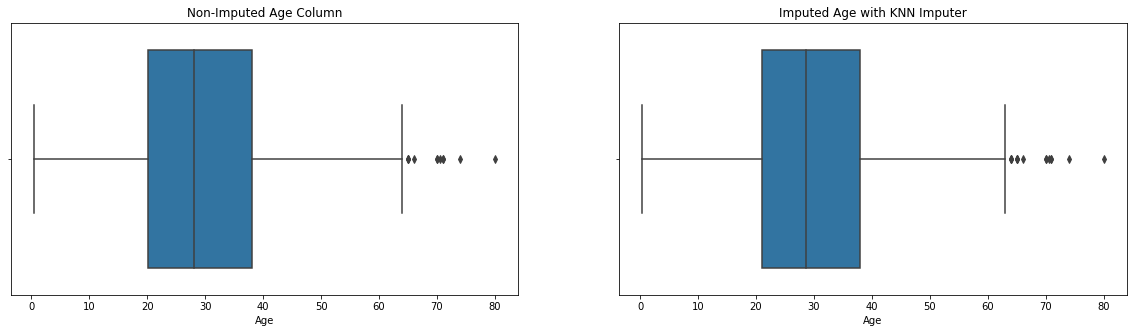

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.boxplot(X['Age'])
plt.title("Non-Imputed Age Column")

plt.subplot(1,2,2)
sns.boxplot(X_knn['Age'])
plt.title("Imputed Age with KNN Imputer")

In [ ]:
X_clean = pd.concat([X_knn, y], axis = 1)
X_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,1
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,1
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,1
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0


In [ ]:
X_clean.to_csv("X_clean.csv", index= False)

In [2]:
X_clean = pd.read_csv("/content/X_clean.csv")
X_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,1
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,1
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,1
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0


In [4]:
X  = X_clean.drop("Survived", axis = 1)
y = X_clean.Survived

## Data Balancing Techniques

In [7]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [8]:
over = RandomOverSampler(random_state= 0 )
x_over, y_over = over.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [9]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
pd.Series(y_over).value_counts()

1    549
0    549
dtype: int64

In [12]:
under = RandomUnderSampler(random_state= 0)
x_under, y_under = under.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
pd.Series(y_under).value_counts()

1    342
0    342
dtype: int64

In [14]:
smote = SMOTE(random_state= 0 )
X_smote, y_smote = smote.fit_resample(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
pd.Series(y_smote).value_counts()

1    549
0    549
dtype: int64

In [16]:
# Weight of class

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(X)

print("Recall: ", metrics.recall_score(y, y_pred))

Recall:  0.7046783625730995


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(class_weight= {0:0.38, 1: 0.61})
logreg.fit(X,y)
y_pred = logreg.predict(X)

print("Recall: ", metrics.recall_score(y, y_pred))

Recall:  0.7690058479532164
